In [9]:
#Model to predict and analyze the customer traits resulting in churning of customer from a telecom company's service.

In [10]:
#importing the libraries to work with datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
#B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.
telcus1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
telcus2 =pd.read_csv("TelcomCustomer-Churn_2.csv")

In [12]:
telcus1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [13]:
telcus2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
print(telcus1.shape)
print(telcus2.shape)

(7043, 10)
(7043, 12)


In [15]:
#C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 
df1 = pd.merge(telcus1,telcus2,on="customerID")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1.shape

(7043, 21)

In [17]:
#D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
verification = set(df1.columns)==set((telcus1.columns).union(telcus2.columns))
if verification:
    print("All the columns are incorporated in the merged DataFrame.")
else:
    print("All the columns are not incorporated in the merged DataFrame.")

All the columns are incorporated in the merged DataFrame.


**2. Data Cleaning & Analysis**

In [18]:
#A. Impute missing/unexpected values in the DataFrame.
def check_perc_missing_value(df):
    missing_values=df.isnull().sum()/len(df)*100
    print("percentage of missing data of dataframe\n"+missing_values.to_string())
check_perc_missing_value(df1)

percentage of missing data of dataframe
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
columns = df1.columns
for col in columns:
    print(f"The unique values of {col} are\n", df1[col].unique())

The unique values of customerID are
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The unique values of gender are
 ['Female' 'Male']
The unique values of SeniorCitizen are
 [0 1]
The unique values of Partner are
 ['Yes' 'No']
The unique values of Dependents are
 ['No' 'Yes']
The unique values of tenure are
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
The unique values of PhoneService are
 ['No' 'Yes']
The unique values of MultipleLines are
 ['No phone service' 'No' 'Yes']
The unique values of InternetService are
 ['DSL' 'Fiber optic' 'No']
The unique values of OnlineSecurity are
 ['No' 'Yes' 'No internet service']
The unique values of OnlineBackup are
 ['Yes' 'No' 'No internet service']
The unique values of DeviceProtection are
 ['No' 'Yes' 'No internet service']
The un

As we can see there are no null or nan values in the dataframe. However there are unexpected values as "No internet service"/"No Phone service".
The columns that have these values like "Multiple Lines" the data should be as "Yes" or "No", it also has "No Phone service" which basically means
No multiple lines.

In [21]:
def replace_strings(df, strings_to_replace, replacement):
    for col in columns:
        df[col] = df[col].replace(strings_to_replace, replacement)
strings_to_replace = ['No phone service', 'No internet service']
replacement="No"
replace_strings(df1,strings_to_replace,replacement)

In [22]:
for col in df1.columns:
    print(f"The unique values of {col} are\n", df1[col].unique())

The unique values of customerID are
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The unique values of gender are
 ['Female' 'Male']
The unique values of SeniorCitizen are
 [0 1]
The unique values of Partner are
 ['Yes' 'No']
The unique values of Dependents are
 ['No' 'Yes']
The unique values of tenure are
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
The unique values of PhoneService are
 ['No' 'Yes']
The unique values of MultipleLines are
 ['No' 'Yes']
The unique values of InternetService are
 ['DSL' 'Fiber optic' 'No']
The unique values of OnlineSecurity are
 ['No' 'Yes']
The unique values of OnlineBackup are
 ['Yes' 'No']
The unique values of DeviceProtection are
 ['No' 'Yes']
The unique values of TechSupport are
 ['No' 'Yes']
The unique values of StreamingTV are
 ['

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"], errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
mean_Tc = df1["TotalCharges"].mean()
df1["TotalCharges"].fillna(mean_Tc, inplace=True)
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
#B. Make sure all the variables with continuous values are of ‘Float’ type.
def convert_to_float(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].astype('float')

df2 = df1.copy()
convert_to_float(df2)
df2.dtypes


customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Even Senior citizen column has been converted to float, however it only conveys YES or No information using 1.0 and 0.0, so it is not a problem.

In [28]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
#We dont need customerID in pie chart so dropping it.
df3 = df2.drop("customerID",axis=1 )
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


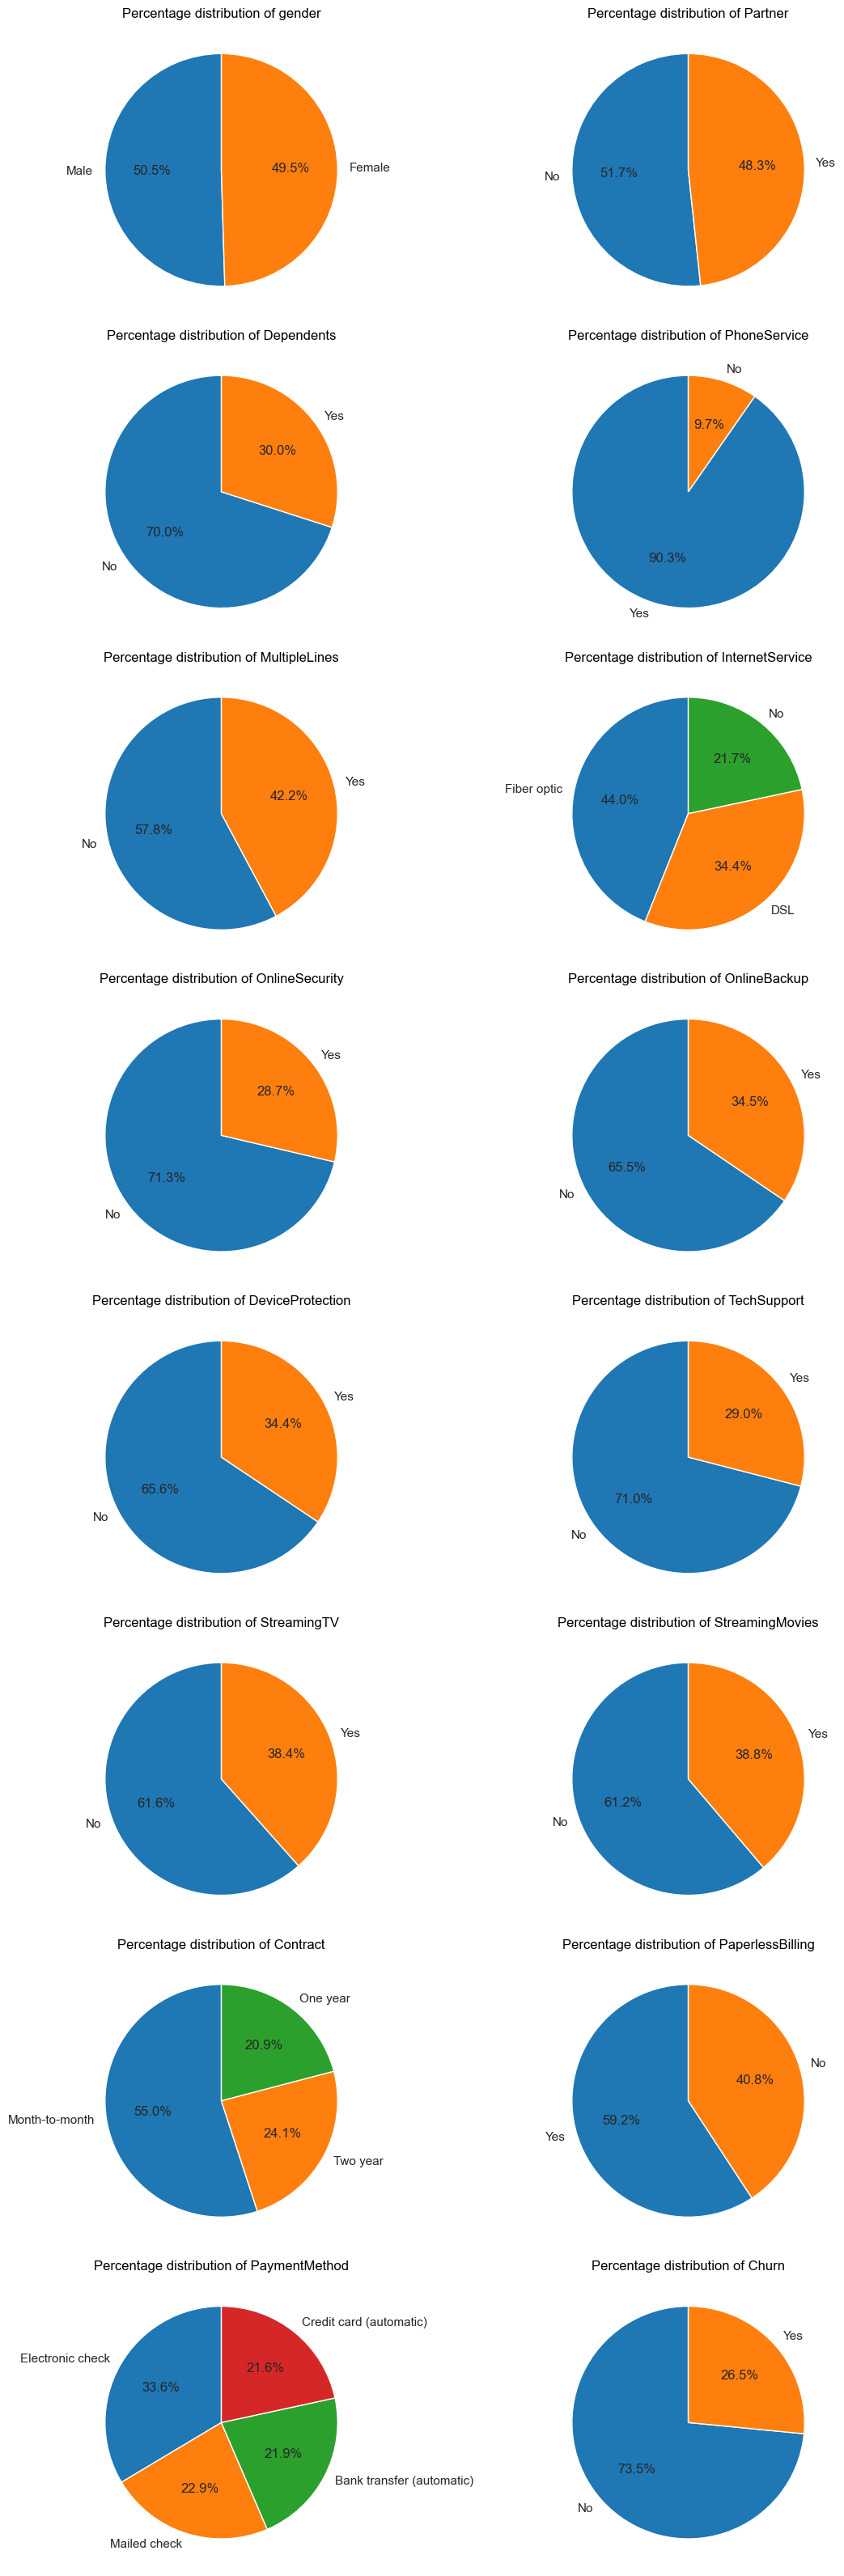

In [30]:
def plot_categorical_pie_charts(df):
    # Identifying categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Calculating the number of rows needed based on the number of columns
    num_rows = (len(categorical_columns) + 1) // 2

    # Creating subplots with 2 columns
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        # Counting the frequency of each category
        category_counts = df[column].value_counts()

        # Ploting pie chart using Seaborn
        sns.set(style="whitegrid")
        sns.color_palette("pastel")

        # Ploting each pie chart in the grid
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Percentage distribution of {column}')

    # Adjusting layout to prevent overlap
    plt.tight_layout()
    plt.show()

plot_categorical_pie_charts(df3)


## Insights
<span style="font-size:20px">
1) It is clearly evident that the data is harmonously distributed in Gender and Partner feature.<br>
2) Many features like Dependants, Multiple Lines, Online backup, Online security, Device Protection, Tech support, Streaming services (TV/Movies), Paperless billing and churn are divided almost in 65:35 ratio.<br>
3) Each payment method is used approximately by quater of user base.<br>
4) More than half of User base is having Month to Month Billing contract.
</span>

In [31]:
#E. Encode all the appropriate Categorical features with the best suitable approach.
#Label encoding the columns with only 2 categories
label_encode_col = ["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                     "StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

from sklearn.preprocessing import LabelEncoder
df4=df3.copy()
label_encoder = LabelEncoder()
for column in label_encode_col:
    df4[column + '_encoded'] = label_encoder.fit_transform(df3[column])
df4.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PhoneService_encoded,MultipleLines_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded
0,Female,0.0,Yes,No,1.0,No,No,DSL,No,Yes,...,0,0,0,1,0,0,0,0,1,0
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,...,1,0,1,0,1,0,0,0,0,0
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,1,0,1,1,0,0,0,0,1,1
3,Male,0.0,No,No,45.0,No,No,DSL,Yes,No,...,0,0,1,0,1,1,0,0,0,0
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,...,1,0,0,0,0,0,0,0,1,1


In [32]:
#Dropping the columns that have been label encoded 
df4.drop(label_encode_col,axis=1, inplace=True)
df4.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded
0,0.0,1.0,DSL,Month-to-month,Electronic check,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0.0,34.0,DSL,One year,Mailed check,56.95,1889.50,1,0,0,1,0,1,0,1,0,0,0,0,0
2,0.0,2.0,DSL,Month-to-month,Mailed check,53.85,108.15,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0.0,45.0,DSL,One year,Bank transfer (automatic),42.30,1840.75,1,0,0,0,0,1,0,1,1,0,0,0,0
4,0.0,2.0,Fiber optic,Month-to-month,Electronic check,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,1,1


In [33]:
df5=df4.copy()
df5.head()

,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded
0,0.0,1.0,DSL,Month-to-month,Electronic check,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0.0,34.0,DSL,One year,Mailed check,56.95,1889.50,1,0,0,1,0,1,0,1,0,0,0,0,0
2,0.0,2.0,DSL,Month-to-month,Mailed check,53.85,108.15,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0.0,45.0,DSL,One year,Bank transfer (automatic),42.30,1840.75,1,0,0,0,0,1,0,1,1,0,0,0,0
4,0.0,2.0,Fiber optic,Month-to-month,Electronic check,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,1,1


In [34]:
#One hot encoding the columns.
onehot_encode_col = ["InternetService","Contract","PaymentMethod"]
for col in onehot_encode_col:
    df_one_hot=pd.get_dummies(df5[col],prefix="encoded",drop_first=True)
    df5 = pd.concat([df_one_hot,df5],axis=1)

df5.drop(onehot_encode_col,axis=1,inplace=True)

In [35]:
df5.head()


,encoded_Credit card (automatic),encoded_Electronic check,encoded_Mailed check,encoded_One year,encoded_Two year,encoded_Fiber optic,encoded_No,SeniorCitizen,tenure,MonthlyCharges,...,PhoneService_encoded,MultipleLines_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,PaperlessBilling_encoded,Churn_encoded
0,False,True,False,False,False,False,False,0.0,1.0,29.85,...,0,0,0,1,0,0,0,0,1,0
1,False,False,True,True,False,False,False,0.0,34.0,56.95,...,1,0,1,0,1,0,0,0,0,0
2,False,False,True,False,False,False,False,0.0,2.0,53.85,...,1,0,1,1,0,0,0,0,1,1
3,False,False,False,True,False,False,False,0.0,45.0,42.30,...,0,0,1,0,1,1,0,0,0,0
4,False,True,False,False,False,True,False,0.0,2.0,70.70,...,1,0,0,0,0,0,0,0,1,1


In [36]:
df6=df5.copy()

In [37]:
#F.Split the data into 80% train and 20% test.
from sklearn.model_selection import train_test_split
#Independent features
X=df5.drop("Churn_encoded",axis=1)
#Target feature
y=df5["Churn_encoded"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
#G. Normalize/Standardize the data with the best suitable approach
#Creating both Normalized and standardized data for checking which gives better results. 
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler

#creating a minmaxscaler
scaler_norm =MinMaxScaler()

#fitting and transforming the data
X_train_normalized = scaler_norm.fit_transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

In [39]:
#Standardizing the data 
from sklearn.preprocessing import StandardScaler
#creating standardized scaler
scaler_std = StandardScaler()
#fitting and transforming the data
X_train_std = scaler_std.fit_transform(X_train)
X_test_std =scaler_std.transform(X_test)

***3. Model building and performance improvement***

In [40]:
#A. Train a model using Decision tree and check the performance of the model on train and test data.
#Model based on Normalized data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
dt1_normalized = DecisionTreeClassifier(random_state=42)
dt1_normalized.fit(X_train_normalized,y_train)

y_train_predict=dt1_normalized.predict(X_train_normalized)
train_accuracy=accuracy_score(y_train,y_train_predict)
print("Training Accuracy:", train_accuracy)
print("Classification Report (Training):\n", classification_report(y_train, y_train_predict))

y_test_predict=dt1_normalized.predict(X_test_normalized)
test_accuracy=accuracy_score(y_test,y_test_predict)
print("Test Accuracy:",test_accuracy)
print("Classification Report (Test):\n",classification_report(y_test,y_test_predict))



Training Accuracy: 0.9985800496982605
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Test Accuracy: 0.7061745919091554
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.44      0.44      0.44       373

    accuracy                           0.71      1409
   macro avg       0.62      0.62      0.62      1409
weighted avg       0.71      0.71      0.71      1409



In [41]:
#Model based on standardized data
dt1_std = DecisionTreeClassifier(random_state=42)
dt1_std.fit(X_train_std,y_train)

y_train_predict=dt1_std.predict(X_train_std)
train_accuracy=accuracy_score(y_train,y_train_predict)
print("Training Accuracy:", train_accuracy)
print("Classification Report (Training):\n", classification_report(y_train, y_train_predict))

y_test_predict=dt1_std.predict(X_test_std)
test_accuracy=accuracy_score(y_test,y_test_predict)
print("Test Accuracy:",test_accuracy)
print("Classification Report (Test):\n",classification_report(y_test,y_test_predict))


Training Accuracy: 0.9985800496982605
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Test Accuracy: 0.7047551454932577
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.44      0.44      0.44       373

    accuracy                           0.70      1409
   macro avg       0.62      0.62      0.62      1409
weighted avg       0.70      0.70      0.70      1409



****As we can see both the Normalized and Standardized data gives Overfitted model****

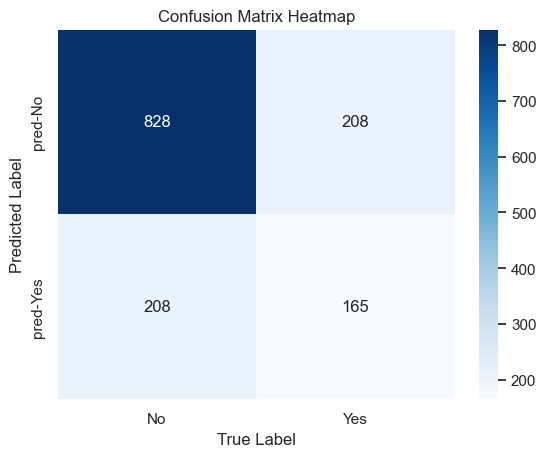

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

In [43]:
#B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b
from sklearn.model_selection import GridSearchCV
#I will be using the normalized data Decision trees model and improve its performance
#Hyperparmaters for grid search
params_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]  
}

#Creating GridSearchCV object
grid_search = GridSearchCV(dt1_normalized,params_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_normalized,y_train)

#Best Hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:",best_params)

#Evaluating model on Training set using best hyperparameters
best_dt1 = grid_search.best_estimator_
y_train_predict=best_dt1.predict(X_train_normalized)

#Training Accuracy calculations
train_accuracy = accuracy_score(y_train,y_train_predict)
print("Train Accuracy:",train_accuracy)
print("Classification Report (Train):\n",classification_report(y_train,y_train_predict))

#Evaluating model on Testing set using best hyperparameters
y_test_predict=best_dt1.predict(X_test_normalized)

#Testing Accuracy calculations
test_accuracy = accuracy_score(y_test,y_test_predict)
print("Test Accuracy:",test_accuracy)
print("Classification Report (Test):\n",classification_report(y_test,y_test_predict))




Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.7902023429179978
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      4138
           1       0.63      0.50      0.56      1496

    accuracy                           0.79      5634
   macro avg       0.73      0.70      0.71      5634
weighted avg       0.78      0.79      0.78      5634

Test Accuracy: 0.7913413768630234
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [44]:
df6["Churn_encoded"].value_counts()

Churn_encoded
0    5174
1    1869
Name: count, dtype: int64

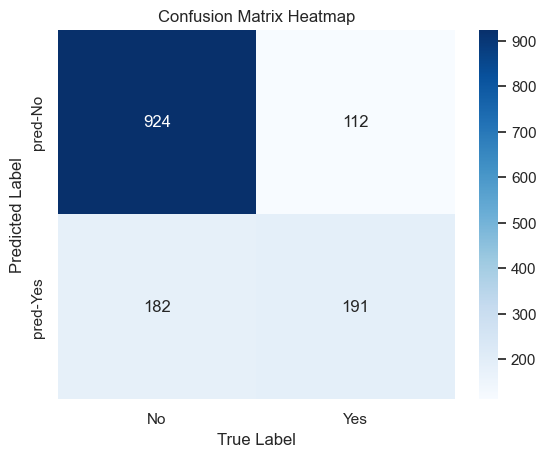

In [45]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

**Difference observed in best model and normal model**<br>
<span style="font-size:15px">
1)In our first model (dt1), the model overfitted the data with training & testing acuuracy of 99% and 70%.<br>
2)After hyperparamter tuning of the model (dt1), the model was improved as its training and test accurqacy stood at 79%.<br>
3)Recall in first model has been improved in the tuned model from (80,44) to (90,51).<br>
</span>

In [46]:
#Train a model using Random forest and check the performance of the model on train and test data
from sklearn.ensemble import RandomForestClassifier
#Creating a randomforeest model
rfm1 = RandomForestClassifier(random_state=42)
#Fitting Training data 
rfm1.fit(X_train_normalized,y_train)

#Preidcting on training set
y_train_predict = rfm1.predict(X_train_normalized)

#Accuracy of model on training data
train_accuracy = accuracy_score(y_train,y_train_predict)
print("Training accuracy:",train_accuracy)
print("Classification Report:\n",classification_report(y_train,y_train_predict))

#Predicting on test set
y_test_predict=rfm1.predict(X_test_normalized)

#Accuracy of model on test data
test_accuracy = accuracy_score(y_test,y_test_predict)
print("Testing accuracy:",test_accuracy)
print("Classification Report:\n",classification_report(y_test,y_test_predict))


Training accuracy: 0.9985800496982605
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

Testing accuracy: 0.7955997161107168
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



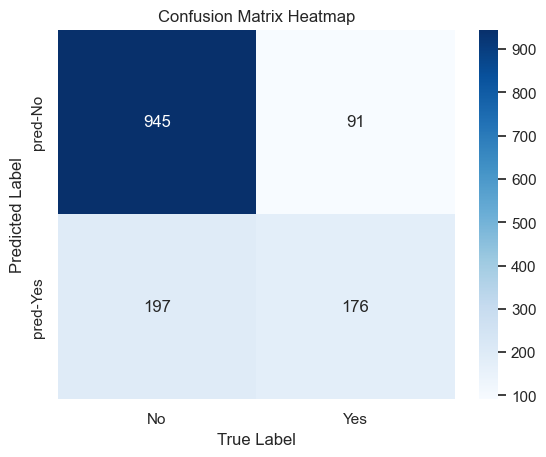

In [47]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

**This Model is also overfitting**

In [48]:
#D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data
params_grid ={
    "n_estimators":[50,100],
    "max_depth":[None,5],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "class_weight":[None,"balanced"]
}

#creating grid search object
grid_search = GridSearchCV(rfm1,params_grid,cv=5,scoring='accuracy')
#fitting the grid with data
grid_search.fit(X_train_normalized,y_train)

#getting best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:",best_params)

#creating model with best hyperparameters and evaluating it
best_rfm1 = grid_search.best_estimator_
y_train_predict = best_rfm1.predict(X_train_normalized)
y_test_predict=best_rfm1.predict(X_test_normalized)
##Evaluate performance on the train set
train_accuracy=accuracy_score(y_train,y_train_predict)
print("\nTraining Accuracy (Best Model):", train_accuracy)
print("Classification Report (Training):\n", classification_report(y_train, y_train_predict))


#Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_predict)
print("\nTesting Accuracy (Best Model):", test_accuracy)
print("Classification Report (Testing):\n", classification_report(y_test, y_test_predict))

Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Training Accuracy (Best Model): 0.8651047213347532
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4138
           1       0.82      0.63      0.71      1496

    accuracy                           0.87      5634
   macro avg       0.85      0.79      0.81      5634
weighted avg       0.86      0.87      0.86      5634


Testing Accuracy (Best Model): 0.8105039034776437
Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



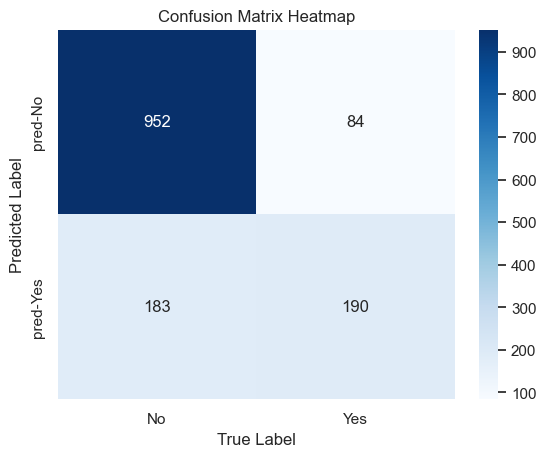

In [49]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

### Performance comparison of models
**1)The base model was overfitted with data as it showed train accuracy of 99% and test accuracy of 79%.**  
**2)After the hyperparameter tuning of the model, the model is not overfitted as the training and test accuracy are pretty close with 86% and 81% respectively.**  
**3)The recall for test data is slightly improved.**

In [50]:
#Train a model using Adaboost and check the performance of the model on train and test data
from sklearn.ensemble import AdaBoostClassifier
#Creating a shallow decisiontree
base_estimator = DecisionTreeClassifier(max_depth=1)
#Using Adaboost on our weak decision tree
adaboost_model = AdaBoostClassifier(base_estimator,random_state=42)

#Training the model on Tain data
adaboost_model.fit(X_train_normalized,y_train)

#Predicting with traing data
y_train_predict = adaboost_model.predict(X_train_normalized)
#Predictinh with test data
y_test_predict = adaboost_model.predict(X_test_normalized)

#Evaluating accuracy score fro training data
train_accuracy = accuracy_score(y_train,y_train_predict)
print("Training Accuracy:",train_accuracy)
print("Classification report:\n",classification_report(y_train,y_train_predict))

#Evaluating accuracy score fro training data
test_accuracy = accuracy_score(y_test,y_test_predict)
print("Test Accuracy:",test_accuracy)
print("Classification report:\n",classification_report(y_test,y_test_predict))


Training Accuracy: 0.8045793397231097
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634

Test Accuracy: 0.8197303051809794
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



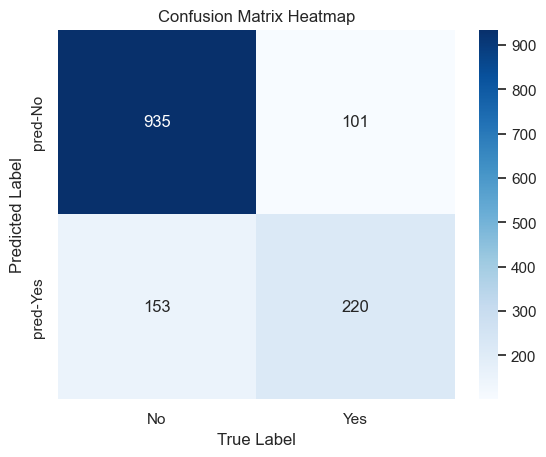

In [51]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

In [52]:
#F. Hyperparameter tuning of Adaboost model
params_grid = {
    "n_estimators":[50,100,200,300],
    "algorithm":['SAMME', 'SAMME.R'],
    'learning_rate': [0.01, 0.1, 1.0]
}

#creating gridsearchcv object
grid_search=GridSearchCV(adaboost_model,params_grid,cv=5,scoring="accuracy")
#fit the data
grid_search.fit(X_train_normalized,y_train)
#Best Parameters
best_params = grid_search.best_params_
print("Best Paramters:", best_params)

#Model with Best parametres
best_adaboost_model = grid_search.best_estimator_

#Predicting on train and test data
y_train_predict = best_adaboost_model.predict(X_train_normalized)
y_test_predict=best_adaboost_model.predict(X_test_normalized)
#Evaluate performance on the train set
train_accuracy=accuracy_score(y_train,y_train_predict)
print("\nTraining Accuracy (Best Model):", train_accuracy)
print("Classification Report (Training):\n", classification_report(y_train, y_train_predict))


#Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_predict)
print("\nTesting Accuracy (Best Model):", test_accuracy)
print("Classification Report (Testing):\n", classification_report(y_test, y_test_predict))


Best Paramters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}

Training Accuracy (Best Model): 0.8036918707845225
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.67      0.51      0.58      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.71      0.73      5634
weighted avg       0.79      0.80      0.79      5634


Testing Accuracy (Best Model): 0.8133427963094393
Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



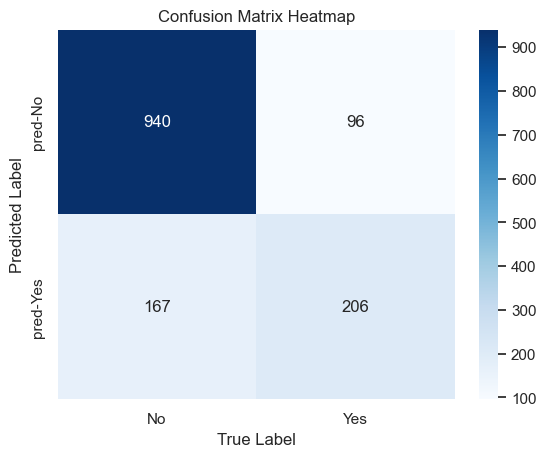

In [53]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

## Performance Comparison of models
**1)The accuracy of both models in training and testing dataset is approximately same, slightly greater in base model**  
**2)The recall rate has slightly changed.**

In [54]:
#G. Train a model using GradientBoost and check the performance of the model on train and test data.
from sklearn.ensemble import GradientBoostingClassifier
#Creating the model
grad_boost_model = GradientBoostingClassifier(random_state=42)
#fitting hte data
grad_boost_model.fit(X_train_normalized,y_train)

#Predicting on train and test data
y_train_predict = grad_boost_model.predict(X_train_normalized)
y_test_predict=grad_boost_model.predict(X_test_normalized)
#Evaluate performance on the train set
train_accuracy=accuracy_score(y_train,y_train_predict)
print("\nTraining Accuracy:", train_accuracy)
print("Classification Report:\n", classification_report(y_train, y_train_predict))


#Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_predict)
print("\nTesting Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_predict))




Training Accuracy: 0.8235711750088747
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4138
           1       0.71      0.56      0.63      1496

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.76      5634
weighted avg       0.82      0.82      0.82      5634


Testing Accuracy: 0.8119233498935415
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



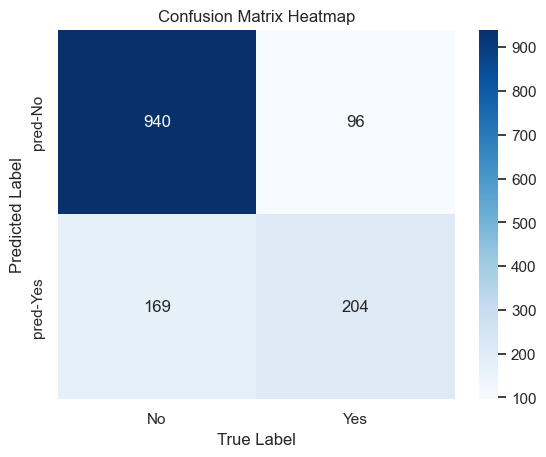

In [55]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

In [56]:
#Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data
params_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[3,4,5],
    'learning_rate': [0.01, 0.1, 1.0],
    "min_samples_split":[2,5,10]
}

#creating gridsearchcv object
grid_search=GridSearchCV(grad_boost_model,params_grid,cv=5,scoring="accuracy")
#fit the data
grid_search.fit(X_train_normalized,y_train)
#Best Parameters
best_params = grid_search.best_params_
print("Best Paramters:", best_params)

#Model with Best parametres
best_grad_boost_model = grid_search.best_estimator_

#Predicting on train and test data
y_train_predict = best_grad_boost_model.predict(X_train_normalized)
y_test_predict=best_grad_boost_model.predict(X_test_normalized)
#Evaluate performance on the train set
train_accuracy=accuracy_score(y_train,y_train_predict)
print("\nTraining Accuracy (Best Model):", train_accuracy)
print("Classification Report (Training):\n", classification_report(y_train, y_train_predict))


#Evaluate performance on the test set
test_accuracy = accuracy_score(y_test, y_test_predict)
print("\nTesting Accuracy (Best Model):", test_accuracy)
print("Classification Report (Testing):\n", classification_report(y_test, y_test_predict))


Best Paramters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}

Training Accuracy (Best Model): 0.8130990415335463
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.70      0.52      0.60      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634


Testing Accuracy (Best Model): 0.8126330731014905
Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



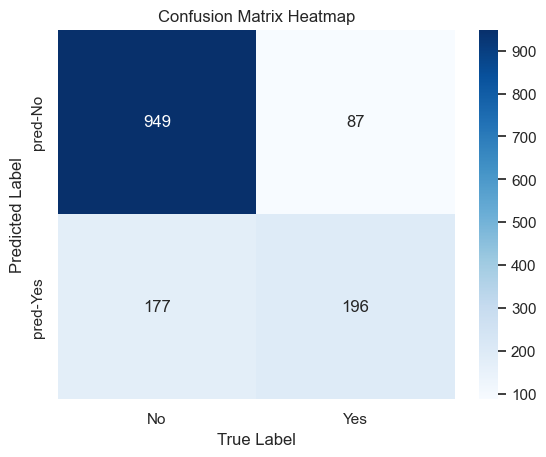

In [57]:
cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["No",'Yes'],yticklabels=["pred-No","pred-Yes"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap');

## Performance Comparison of models
**1)The accuracy of both models in training and testing dataset is approximately same**  
**2)The recall is also similar in both models.**  
**3)There is slight improvement in False negative cases.**


In [58]:
model_names = ['Decsion Tree', 'Tuned Decision Tree', 'Random Forest','Tuned Random forest',
               'AdaBoost','Tuned AdaBoost','Gradient Boosting','Tuned Gradient Boosting']
train_accuracy = [99,79,99,86,80,80,82,81]
test_accuracy = [70,79,79,81,81,81,81,81]
recall_0 = [80,89,91,92,90,91,91,92]
recall_1 = [44,51,47,51,59,55,55,53]
precision_0 = [80,84,83,84,86,85,85,84]
precision_1 = [44,63,66,69,69,68,68,69]
true_positive = [165,191,176,190,220,206,204,196]
false_negative=[208,112,91,84,101,96,96,87]


performance_df = pd.DataFrame({
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Recall 0': recall_0,
    'Recall 1': recall_1,
    'Precision 0': precision_0,
    'Precision 1': precision_1,
    'True Positve':true_positive,
    'False Negative':false_negative
}, index=model_names)


# Display the DataFrame
# pd.reset_option('display.max_columns')
# pd.reset_option('display.expand_frame_repr')

print(performance_df)

                         Train Accuracy  Test Accuracy  Recall 0  Recall 1  \
Decsion Tree                         99             70        80        44   
Tuned Decision Tree                  79             79        89        51   
Random Forest                        99             79        91        47   
Tuned Random forest                  86             81        92        51   
AdaBoost                             80             81        90        59   
Tuned AdaBoost                       80             81        91        55   
Gradient Boosting                    82             81        91        55   
Tuned Gradient Boosting              81             81        92        53   

                         Precision 0  Precision 1  True Positve  \
Decsion Tree                      80           44           165   
Tuned Decision Tree               84           63           191   
Random Forest                     83           66           176   
Tuned Random forest          

# I. Detailed analysis
***(1) Comparing the performance of each model in train stage and test stage.***  
*1)All the base models except AdaBoost and GradBoost are overfitted models. After tuning Random Forest classifier showed better Training accuracy with 86% and Testing accuracy of 81%. Adaboost and GradientBoost also had similar Test accuracy of 81% with lower training accuracy compared to Random Forest classifier.*  
*2) Based on Recall and Precision all models except the Decision Tree are approximately similar.*

**(2) Observation on which model performed the best**  
*1) The best model would be AdaBoost as it had shown better performance considering the Accuracy, recall and Precision parameters. However after looking at the True Positive rate of model, which is important as we want to identify the customer attrition, so the model that identifies these customers is the required model.*

**(3) Reasoning on why the model performed best**  
*1) The AdaBoost model had Train and Test Accuracy of 80% and 81% respectively, which shows that the model captures all the data and performs excellently on new data. The recall is also exceptional. The True Positive rate of the model is also very good as it identitifies most of the Positives. Thus accomplishing our objective of identifying the customers that are porting out.*

**(4) Final conclusion on your observation**  
*1) My conclusion is that AdaBoost accomplishes our objective. However, as we have imbalanced data as the target variable is divided in 1:4 ratio, thus having more data or a balanced data could result in a better model.*
